In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from data_analysis_preparation.utils import (filter_biocard_diagnosis_criteria,
                                             get_joined_biocard_df)

### Load data

In [2]:
BIOCARD_SCANS_DIRECTORY = r"/media/dpolak/MRI/FULL_PIPELINE_BIOCARD"
BIOCARD_DIAGNOSIS_DATA = r"../DATA/BIOCARD_DiagnosisData_Limited_2022.05.14.xlsx"  # You need to download BIOCARD_DiagnosisData_Limited_2022.05.14.xlsx file
BIOCARD_DEMOGRAPHIC_DATA = r"../DATA/BIOCARD_Demographics_Limited_Data_2022.05.10.xlsx"  # You need to download BIOCARD_Demographics_Limited_Data_2022.05.10.xlsx file
BIOCARD_FUNCTIONAL_DATA = r"../DATA/BIOCARD_Functional_Evaluation_Limited_2022.05.16.xlsx"  # You need to download BIOCARD_Functional_Evaluation_Limited_2022.05.16.xlsx file
BIOCARD_COGNITIVE_DATA = r"../DATA/BIOCARD_CognitiveData_Limited_2022.05.14.xlsx"  # You need to download BIOCARD_CognitiveData_Limited_2022.05.14.xlsx file
BIOCARD_MRI_SUBJECT_DATA = "../DATA/BIOCARD_SUBJECTS.csv"

In [3]:
df_biocard = get_joined_biocard_df(biocard_diagnosis_data=BIOCARD_DIAGNOSIS_DATA,
                                   biocard_mri_subject_data=BIOCARD_MRI_SUBJECT_DATA,
                                   scans_path=BIOCARD_SCANS_DIRECTORY,
                                    biocard_demographic_data=BIOCARD_DEMOGRAPHIC_DATA,
                                    biocard_functional_data=BIOCARD_FUNCTIONAL_DATA,
                                    biocard_cognitive_data=BIOCARD_COGNITIVE_DATA)
df_biocard_revised = filter_biocard_diagnosis_criteria(df_biocard)

/home/dpolak/miniconda3/envs/MAGISTERKA/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/dpolak/miniconda3/envs/MAGISTERKA/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Demographics

In [4]:
df_biocard_revised[["SEX"]].value_counts()

SEX   
Female    1262
Male       807
Name: count, dtype: int64

In [5]:
df_biocard_revised[["AGE"]].describe()

,AGE
count,2069.000000
mean,64.307878
std,10.985943
min,20.000000
25%,57.000000
50%,65.000000
75%,73.000000
max,93.000000


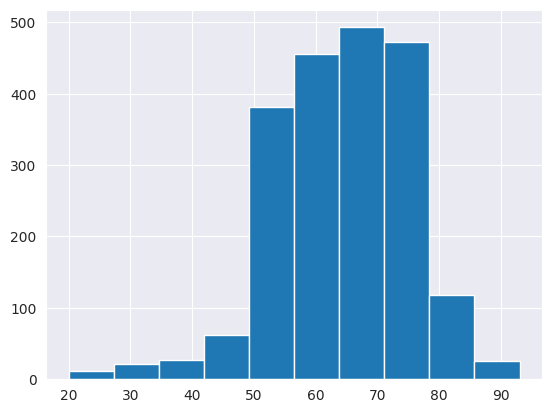

In [6]:
age_hist = df_biocard_revised['AGE'].hist()
fig = age_hist.get_figure()
fig.savefig("BIOCARD_age_histogram")

In [7]:
df_patients = df_biocard_revised[["JHUANONID", "AGE", "DX", "SEX"]].groupby("JHUANONID").agg({"AGE": "mean", "DX": "first", "SEX": "first"})
df_patients['AGE'] = df_patients['AGE'].astype(int)

In [8]:
pd.DataFrame({
 "age_AD": df_patients[df_patients["DX"] == "AD"]["AGE"].describe(),
 "age_AD_female": df_patients[(df_patients["DX"] == "AD") & (df_patients["SEX"] == "Female")]["AGE"].describe(),
 "age_AD_male": df_patients[(df_patients["DX"] == "AD") & (df_patients["SEX"] == "Male")]["AGE"].describe()
})

,age_AD,age_AD_female,age_AD_male
count,6.000000,3.000000,3.000000
mean,72.333333,69.333333,75.333333
std,4.633213,5.131601,0.577350
min,65.000000,65.000000,75.000000
25%,69.750000,66.500000,75.000000
50%,75.000000,68.000000,75.000000
75%,75.000000,71.500000,75.500000
max,76.000000,75.000000,76.000000


In [9]:
pd.DataFrame({
 "age_MCI": df_patients[df_patients["DX"] == "MCI"]["AGE"].describe(),
 "age_MCI_female": df_patients[(df_patients["DX"] == "MCI") & (df_patients["SEX"] == "Female")]["AGE"].describe(),
 "age_MCI_male": df_patients[(df_patients["DX"] == "MCI") & (df_patients["SEX"] == "Male")]["AGE"].describe()
})

,age_MCI,age_MCI_female,age_MCI_male
count,62.000000,31.000000,31.000000
mean,66.129032,64.967742,67.290323
std,6.990588,7.386853,6.481736
min,44.000000,44.000000,52.000000
25%,62.000000,61.500000,63.500000
50%,66.000000,64.000000,66.000000
75%,70.750000,70.000000,71.500000
max,83.000000,83.000000,81.000000


In [10]:
pd.DataFrame({
 "age_CN": df_patients[df_patients["DX"] == "CN"]["AGE"].describe(),
 "age_CN_female": df_patients[(df_patients["DX"] == "CN") & (df_patients["SEX"] == "Female")]["AGE"].describe(),
 "age_CN_male": df_patients[(df_patients["DX"] == "CN") & (df_patients["SEX"] == "Male")]["AGE"].describe()
})

,age_CN,age_CN_female,age_CN_male
count,269.000000,160.000000,109.000000
mean,61.851301,61.056250,63.018349
std,10.457814,10.246795,10.700451
min,25.000000,25.000000,27.000000
25%,56.000000,55.000000,58.000000
50%,63.000000,62.000000,64.000000
75%,69.000000,68.000000,70.000000
max,86.000000,84.000000,86.000000


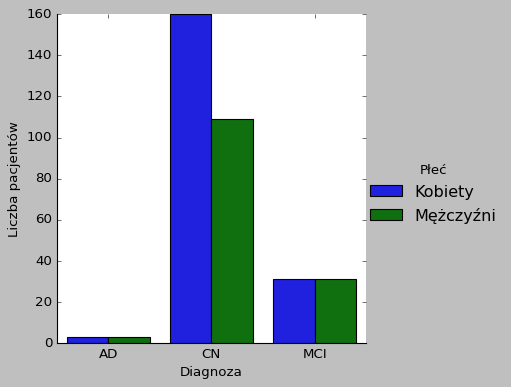

In [11]:
plot_data = df_patients[["DX", "SEX"]].groupby(["DX", "SEX"]).size().reset_index(name="count")
plot_data.columns = ["Diagnoza", "Płeć", "Liczba pacjentów"]
plot_data["Płeć"] = plot_data["Płeć"].map({"Male": "Mężczyźni", "Female": "Kobiety"})
plt.style.use('classic')
sns.catplot(x="Diagnoza", y="Liczba pacjentów", hue="Płeć", data=plot_data, kind="bar").savefig("BIOCARD_diagnosis_sex")